# Inference

In [2]:
from model import Model
from train import parser
import numpy as np
import PIL.Image as pil
import matplotlib.pyplot as plt
import os
import shutil

from utils import normalize_depth_for_display

In [3]:
#path = "../Data_pytorch/2011_09_26_drive_0005_sync_02/"
path = "/HDD/Downloads/Datasets/data_odometry_color/dataset/sequences/21/image_2"
files = os.listdir(path)[:-1]
files = [os.path.join(path,f) for f in files]
files.sort()

In [4]:
files = files[600:700]

In [5]:
args = vars(parser.parse_args(""))
args['seed'] = 1

model = Model(**args)

In [6]:
depths = model.infere_depth(files,"chpts_2m_nomask/model-199999")
#depths = model.infere_depth(['misc/sample.png'],"chpts_2m_nomask/model-199999")





Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from chpts_2m_nomask/model-199999


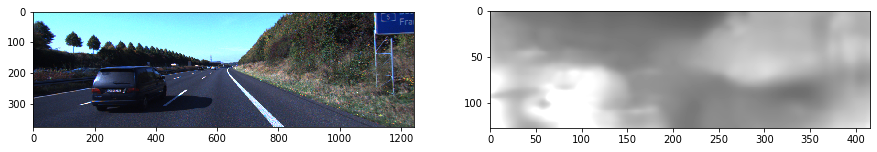

In [7]:
# example of the output
i = 0
f = plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(pil.open(files[i]))
plt.subplot(1,2,2)
plt.imshow(normalize_depth_for_display(depths[i][0,:,:,0]))

In [7]:
# Saving the images in export folder to later make a gif
for i in range(len(files)):
    img = pil.new('RGB',(416,128*2))
    array = (normalize_depth_for_display(depths[0][i,:,:,0])*255).astype(np.uint8)
    d = pil.fromarray(array)
    img.paste(d,(0,128))
    img.paste(pil.open(files[i]).resize((416,128),pil.ANTIALIAS),(0,0))
    img.save("export/%i.jpg"%i)